In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud
import squarify
import nltk
from nltk.stem import PorterStemmer

In [2]:
datos=pd.read_csv('train.csv')

In [19]:
def separarPuntuacion(x):
  puntuacion="@!?+&*[]-%.:/();$=><|{}^" + "'`"
  for p in puntuacion:
    x=x.replace(p, f' {p} ')
  return x 

def limpiarTextoParaHashtag(x):
    x = re.sub(r"\x89Û_", "", x)
    x = re.sub(r"\x89ÛÒ", "", x)
    x = re.sub(r"\x89ÛÓ", "", x)
    x = re.sub(r"\x89ÛÏWhen", "when", x)
    x = re.sub(r"\x89ÛÏ", "", x)
    x = re.sub(r"China\x89Ûªs", "chinas", x)
    x = re.sub(r"let\x89Ûªs", "lets", x)
    x = re.sub(r"\x89Û÷", "", x)
    x = re.sub(r"\x89Ûª", "", x)
    x = re.sub(r"\x89Û\x9d", "", x)
    x = re.sub(r"å_", "", x)
    x = re.sub(r"\x89Û¢", "", x)
    x = re.sub(r"\x89Û¢åÊ", "", x)
    x = re.sub(r"fromåÊwounds", "from wounds", x)
    x = re.sub(r"åÊ", "", x)
    x = re.sub(r"åÈ", "", x)
    x = re.sub(r"JapÌ_n", "japan", x)    
    x = re.sub(r"Ì©", "e", x)
    x = re.sub(r"å¨", "", x)
    x = re.sub(r"SuruÌ¤", "suruc", x)
    x = re.sub(r"åÇ", "", x)
    x = re.sub(r"å£3million", "3 million", x)
    x = re.sub(r"åÀ", "", x) #Saco Links
    x = re.sub(r"https?:\/\/t.co\/[A-Za-z0-9]+", "", x)
    x=re.sub(r"yyc","calgaryairport",x)
    x=re.sub(r"yycstorm","calgaryairportstorm",x)
    x=re.sub(r"MH370", "malaysiaairlinesflight370",x)
    x=re.sub(r"tcot","topconservativesontwitter",x)
    x=re.sub(r"WX","weather",x)
    x=re.sub(r"abstorm","albertastorm",x)
    x=re.sub(r"mÌ¼sica", "music", x)
    x=re.sub(r"okwx", "oklahomacityweather", x)
    x=re.sub(r"arwx", "arkansasweather", x)    
    x=re.sub(r"gawx", "georgiaweather", x)  
    x=re.sub(r"scwx", "southcarolinaweather", x)  
    x=re.sub(r"cawx", "californiaweather", x)
    x=re.sub(r"tnwx", "tennesseeweather", x)
    x=re.sub(r"azwx", "arizonaweather", x)  
    x=re.sub(r"alwx", "alabamaweather", x)
    x=re.sub(r"wordpressdotcom", "wordpress", x)    
    x=re.sub(r"usNWSgov", "unitedstatesnationalweatherservice", x)
    x=re.sub(r"Suruc", "sanliurfa", x)
    x=re.sub(r"US","unitedstates",x)
    x=re.sub(r"Japanjapan","japan",x)
    x=re.sub(r"RT","retweet",x)
    x=re.sub(r"##","#",x)
    x=re.sub(r"###","#",x)
    x=re.sub(r"GBBO","thegreatbritishbakeoff",x)
    x=re.sub(r"BB17","bigbrother17",x)
    x=re.sub(r"np","nowplaying",x)
    x=re.sub(r"DnB","drumandbass",x)
    x=re.sub(r"EDM","electronicdancemusic",x)
    z=re.sub(r"TBT","throwbackthursday",x)
    return x
def obtenerLista(x):
  aux=list(x.split(" "))
  return aux


In [3]:
datos.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
datos.shape

(7613, 5)

In [5]:
datos.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

# Analisis de los Hashtags

## Los hashtags mas utilizados

In [6]:
def obtenerHastag(x):
  x=limpiarTextoParaHashtag(x)
  x=separarPuntuacion(x)
  palabra=""
  aux=obtenerLista(x)
  for w in aux:
    if(w!="" and w[0]=="#"):
      palabra=palabra+ " " +w[1:len(w)].lower()   
  return palabra

In [7]:
datos["hashtags"]=datos["text"].apply(obtenerHastag)

In [8]:
texto=datos[datos['hashtags']!=""]['hashtags'].agg('sum')

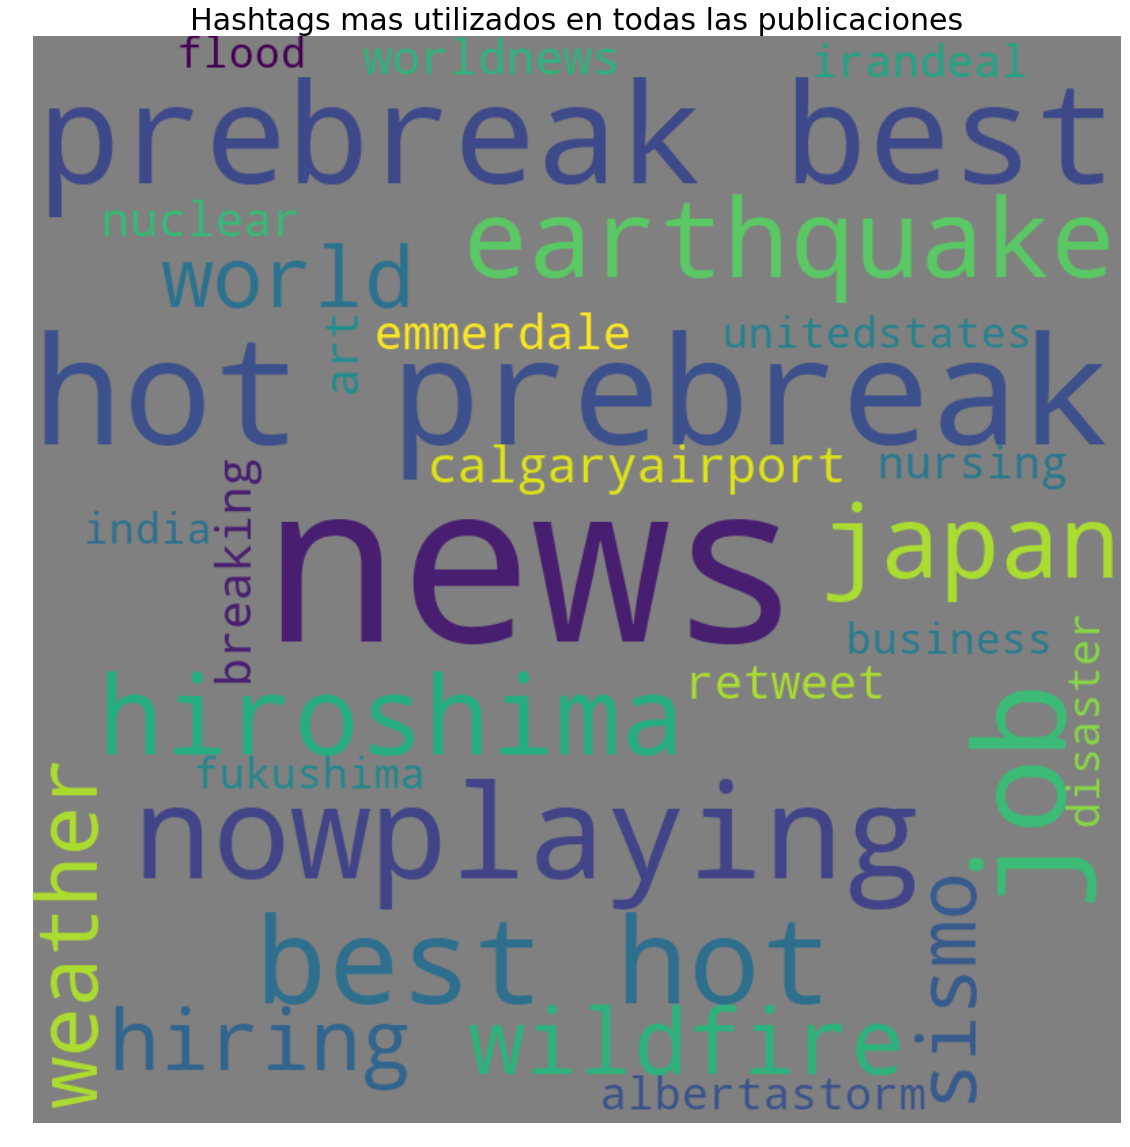

In [9]:
wordcloud = WordCloud(width=800, height=800,max_words=30, margin=0,background_color="grey").generate(texto)
plt.figure(figsize=[25,20])
plt.title('Hashtags mas utilizados en todas las publicaciones',size=30)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
#plt.savefig("analisis_hashtags_0.png",bbox_inch='tight')
plt.show()

In [10]:
textDesastre=datos[(datos['target']==1)&(datos['hashtags']!="")]['hashtags'].agg('sum')

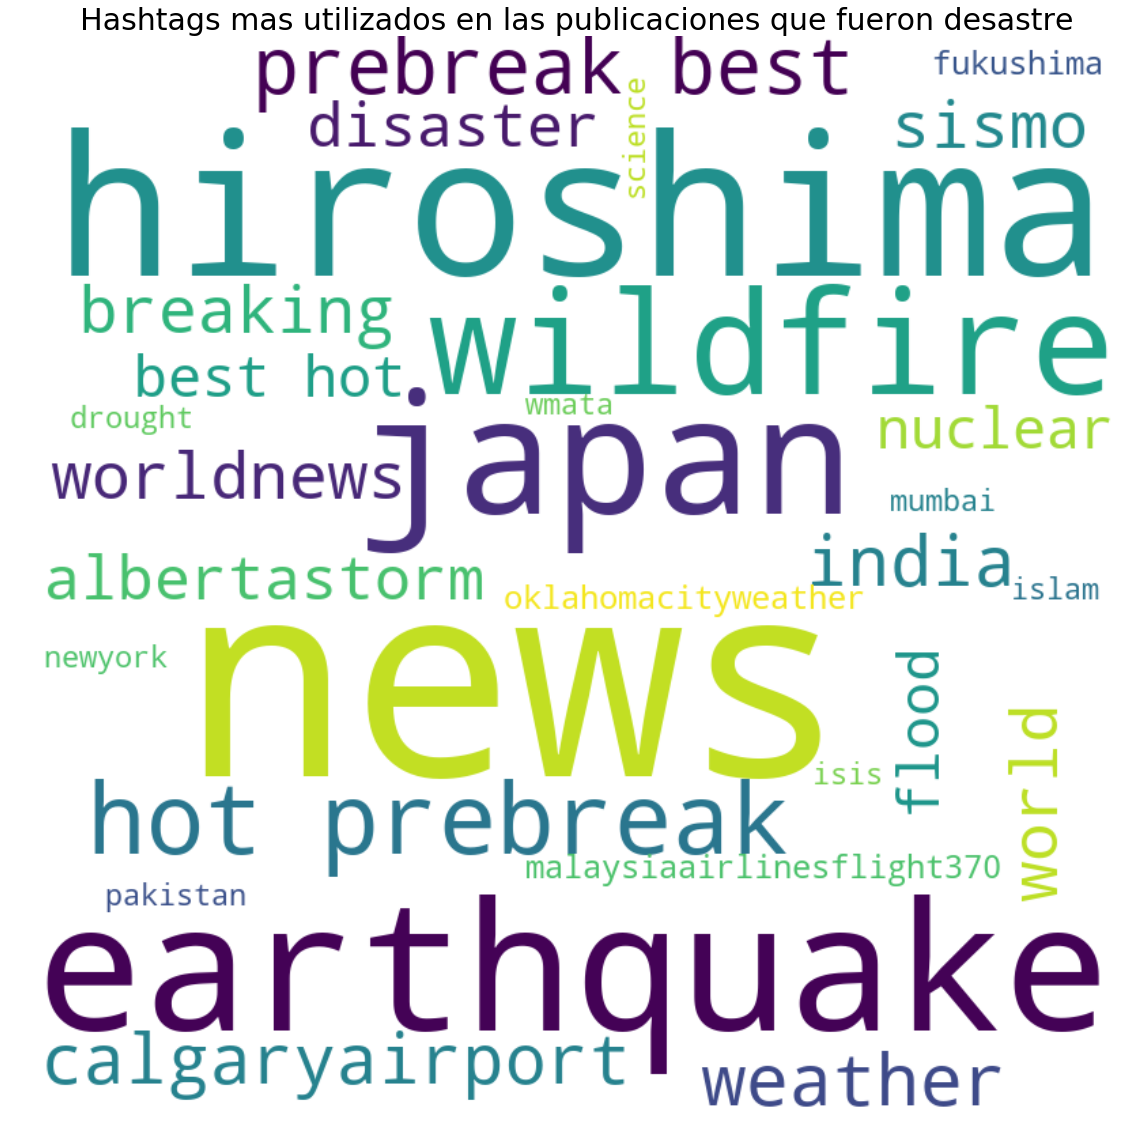

In [11]:
wordcloud2 = WordCloud(width=800, height=800,max_words=30, margin=0,background_color="white").generate(textDesastre)
plt.figure(figsize=[25,20])
plt.title('Hashtags mas utilizados en las publicaciones que fueron desastre',size=30)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
#plt.savefig("analisis_hashtags_1.png",bbox_inch='tight')
plt.show()

In [12]:
textNoDesastre=datos[(datos['target']==0)&(datos['hashtags']!="")]['hashtags'].agg('sum')

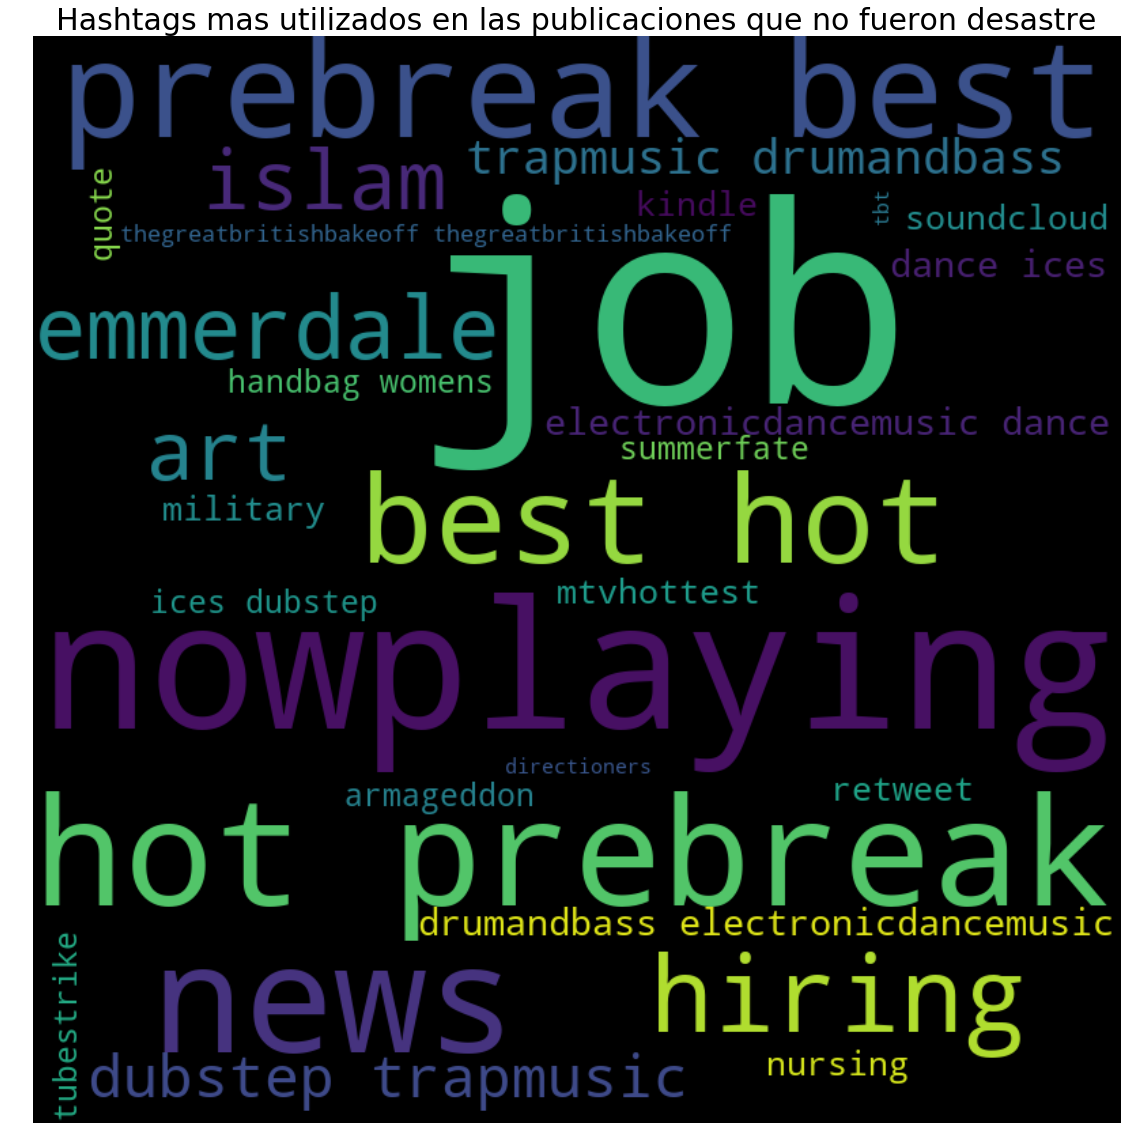

In [13]:
wordcloud2 = WordCloud(width=800, height=800,max_words=30, margin=0,background_color="black").generate(textNoDesastre)
plt.figure(figsize=[25,20])
plt.title('Hashtags mas utilizados en las publicaciones que no fueron desastre',size=30)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
#plt.savefig("analisis_hashtags_2.png",bbox_inch='tight')
plt.show()

## La cantidad de twits donde el keyword coincide con los hashtags utilizados 

In [15]:
datos=datos[['keyword','text','target']]

In [16]:
datos=datos.dropna()

In [17]:
def obtenerHastag_v2(x):
  x=limpiarTextoParaHashtag(x)
  x=separarPuntuacion(x)
  palabra=""
  aux=obtenerLista(x)
  for w in aux:
    if(w!="" and w[0]=="#"):
      palabra=palabra+ "," +w[1:len(w)].lower()
  return palabra

In [18]:
datos['hashtags_utilizados']=datos['text'].apply(obtenerHastag_v2)

In [19]:
def estaEn(x,y):
  return x in y

In [20]:
datos['keyword_coincide_hashtags']=datos.apply(lambda x:estaEn(x.keyword,x.hashtags_utilizados),axis=1)

In [21]:
datos_squarify=datos[['keyword_coincide_hashtags']]

In [22]:
datos_squarify['cantidad']=1

C:\Users\RetailAdmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
datos_squarify=datos_squarify.groupby('keyword_coincide_hashtags').agg({'cantidad':'sum'}).reset_index()

In [24]:
datos_squarify

,keyword_coincide_hashtags,cantidad
0,False,7379
1,True,173


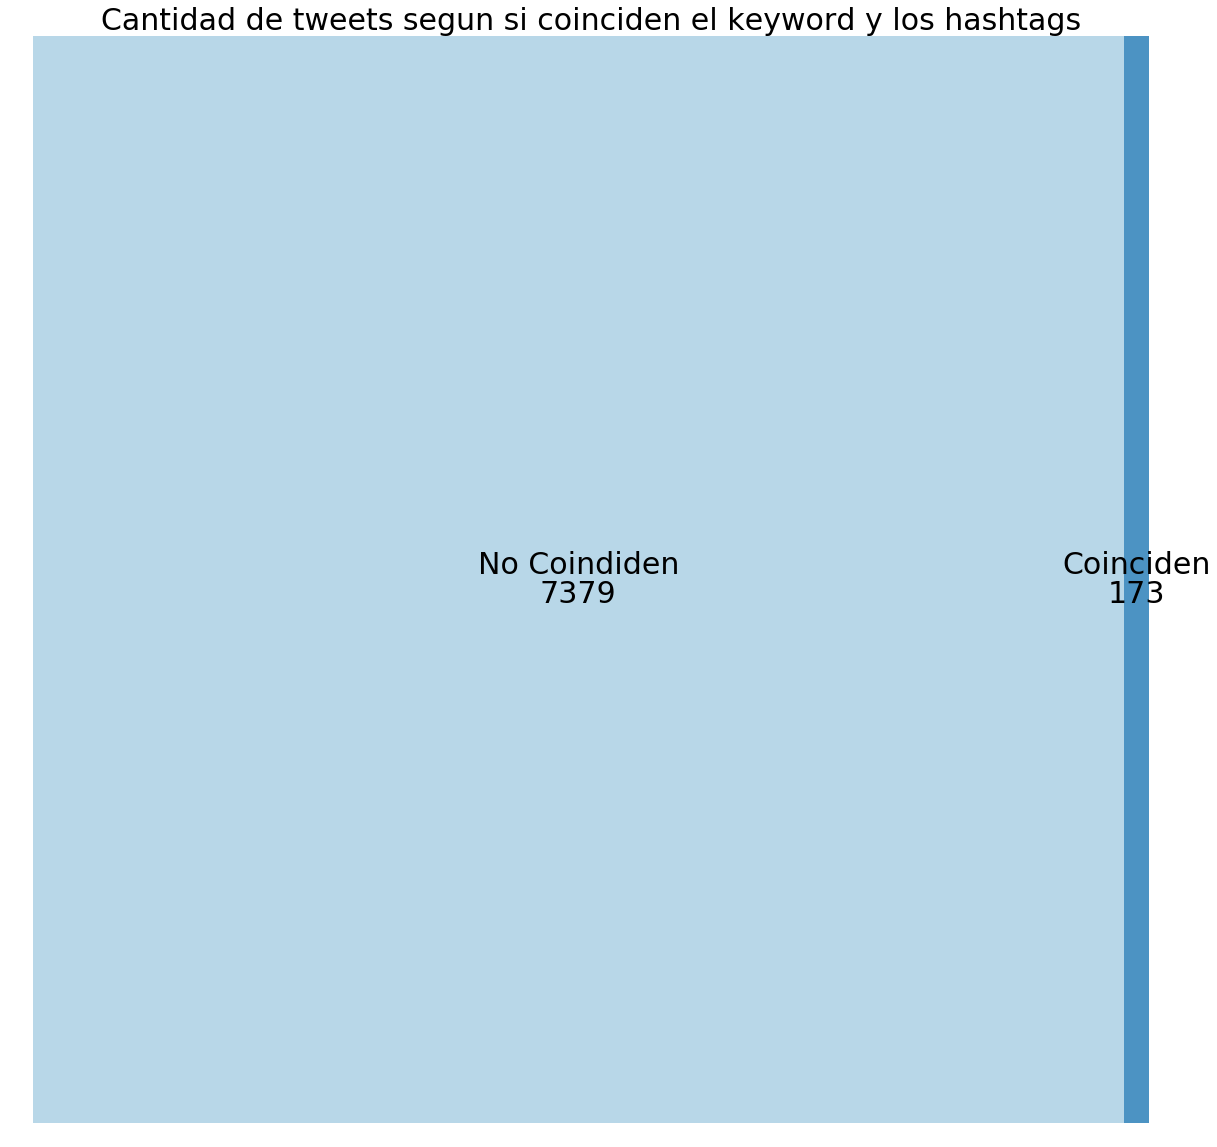

In [35]:
plt.figure(figsize=[20,20])
plt.style.use('ggplot')
squarify.plot(sizes=datos_squarify['cantidad'], label=['No Coindiden','Coinciden'],
              alpha=.8 ,color=plt.cm.Paired(np.arange(2)),value=datos_squarify['cantidad'],
             text_kwargs={'fontsize':30})
plt.title('Cantidad de tweets segun si coinciden el keyword y los hashtags',size=30)
plt.axis('off')
plt.savefig("Cantidad_tweets_keyword_hashtags_0.png",bbox_inch='tight')
plt.show()

In [30]:
auxiliar=datos[['target','keyword_coincide_hashtags']]

In [31]:
auxiliar['cantidad']=1

C:\Users\RetailAdmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
auxiliar.groupby(['keyword_coincide_hashtags','target']).agg({'cantidad':'sum'})

cantidad
keyword_coincide_hashtags target          
False                     0           4232
                          1           3147
True                      0             91
                          1             82

## Distribucion de la cantidad de tweets

In [39]:
def obtenerHastag_v3(x):
  x=limpiarTextoParaHashtag(x)
  x=separarPuntuacion(x)
  palabra=[]
  aux=obtenerLista(x)
  for w in aux:
    if(w!="" and w[0]=="#"):
      palabra.append(w[1:len(w)].lower())   
  return len(palabra)

In [40]:
datos=pd.read_csv('train.csv')

In [41]:
datos=datos[['target','text']]

In [42]:
datos.dropna(inplace=True)

In [43]:
datos['cantidad_hashtags']=datos['text'].apply(obtenerHastag_v3)

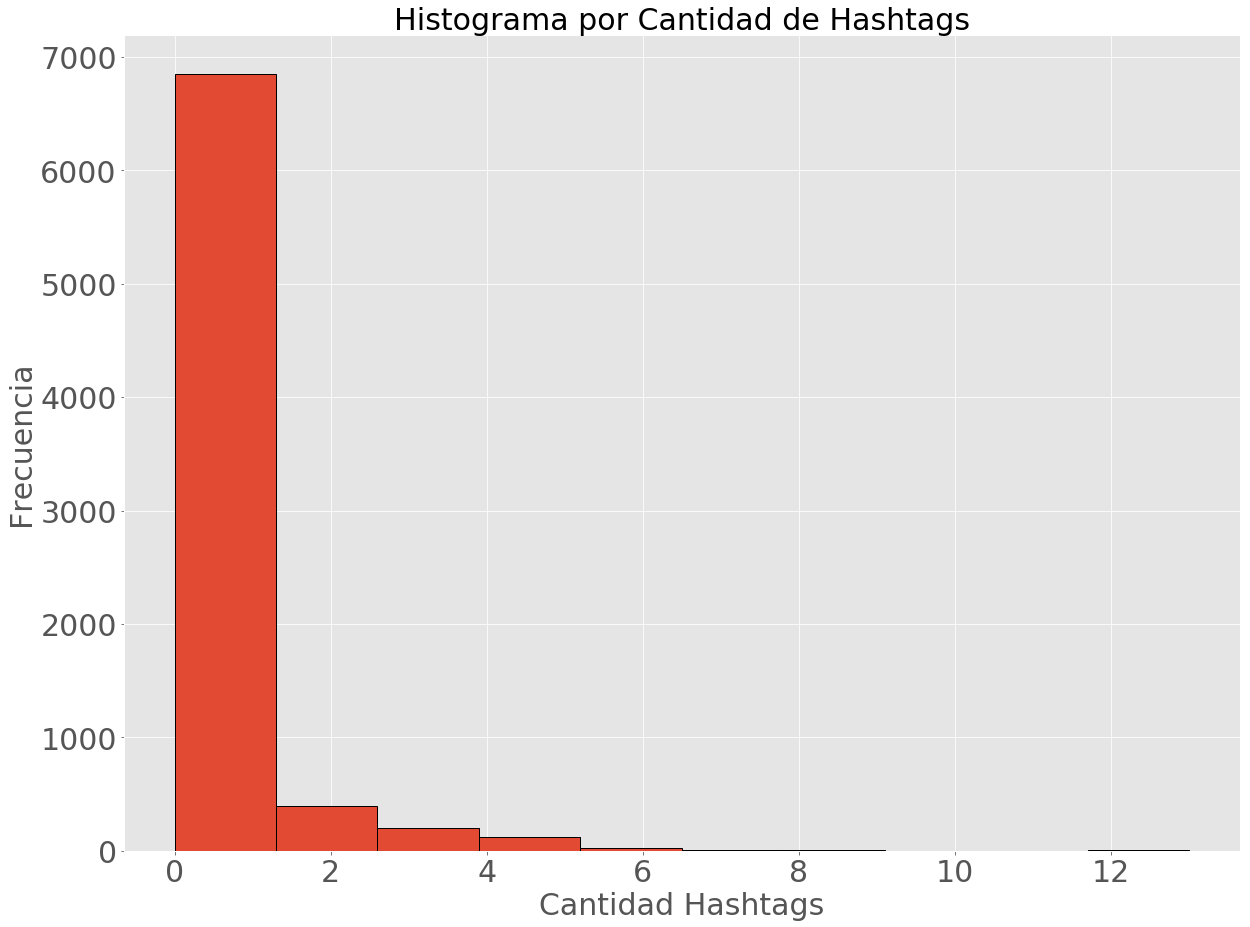

In [45]:
plt.figure(figsize=[20,15])
plt.hist(datos['cantidad_hashtags'],bins=10,edgecolor = 'black',  linewidth=1)
plt.grid(True)
plt.xticks(size=30) 
plt.yticks(size=30)
plt.title('Histograma por Cantidad de Hashtags',size=30)
plt.xlabel('Cantidad Hashtags',size=30)
plt.ylabel('Frecuencia',size=30)
#plt.savefig("histograma_precio_cantidad_hashtags_0.png",bbox_inch='tight')
plt.show()

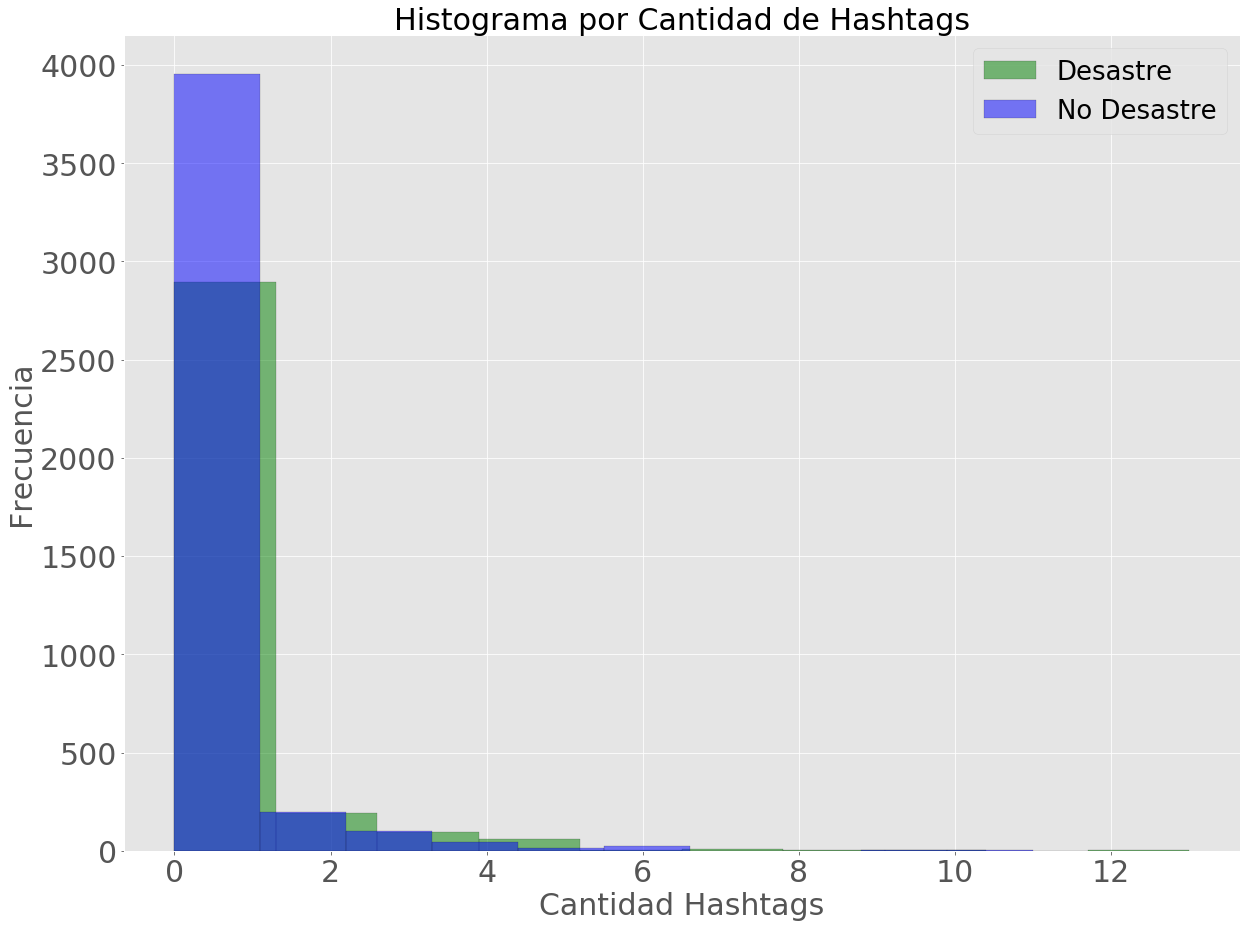

In [46]:
plt.figure(figsize=[20,15])
x1 = datos.loc[datos.target==1,'cantidad_hashtags']
x2 = datos.loc[datos.target==0, 'cantidad_hashtags']

kwargs = dict(alpha=0.5, bins=10,edgecolor = 'black',  linewidth=0.3)

plt.hist(x1, **kwargs, color='g', label='Desastre')
plt.hist(x2, **kwargs, color='b', label='No Desastre')

plt.legend(prop={'size': 26});
plt.grid(True)
plt.xticks(size=30) 
plt.yticks(size=30)
plt.title('Histograma por Cantidad de Hashtags',size=30)
plt.xlabel('Cantidad Hashtags',size=30)
plt.ylabel('Frecuencia',size=30)
plt.savefig("histograma_precio_cantidad_hashtags_1.png",bbox_inch='tight')
plt.show()

## proporción de tweets que utilizan hashtags

In [2]:
datos=pd.read_csv('train.csv')

In [7]:
def obtenerHastag_v3(x):
  x=limpiarTextoParaHashtag(x)
  x=separarPuntuacion(x)
  palabra=[]
  aux=obtenerLista(x)
  for w in aux:
    if(w!="" and w[0]=="#"):
      palabra.append(w[1:len(w)].lower())   
  return len(palabra)

In [8]:
datos=datos[['target','text']]

In [9]:
datos['cantidad_hashtags']=datos['text'].apply(obtenerHastag_v3)

In [10]:
datos['utilizo_hashtag']=datos['cantidad_hashtags'].apply(lambda x: x >=1)

In [11]:
datos['utilizo_hashtag'].value_counts()

False    5889
True     1724
Name: utilizo_hashtag, dtype: int64

In [12]:
datos['cantidad']=1

In [13]:
datos_barras=datos.groupby('utilizo_hashtag').agg({'cantidad':'sum'}).reset_index()

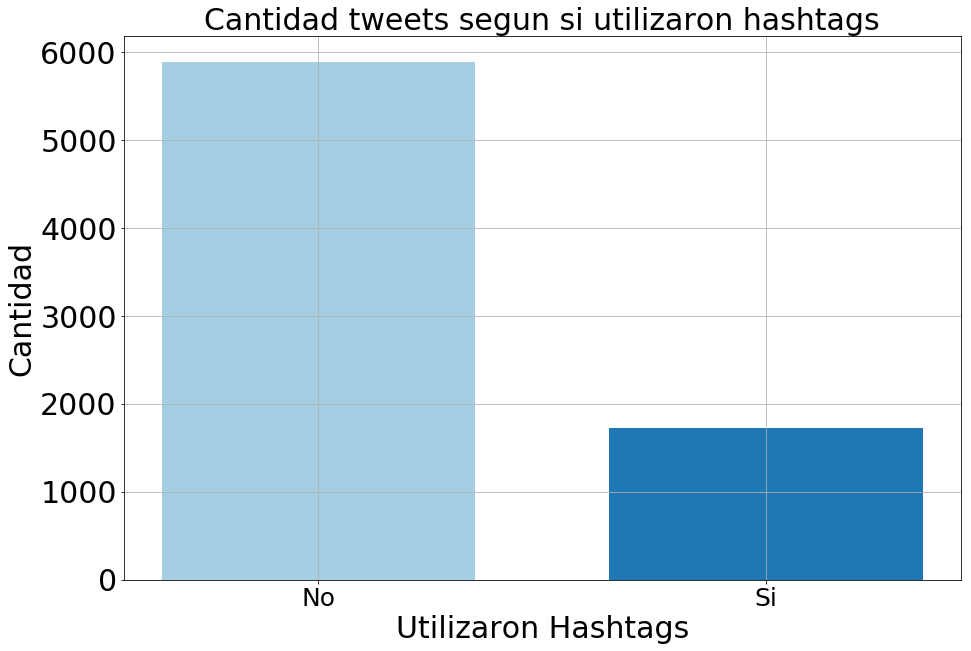

In [15]:
plt.figure(figsize=[15,10])
x=np.arange(len(datos_barras['utilizo_hashtag']))
y=['No','Si']
plt.bar(x,datos_barras['cantidad'], width = 0.7,color=plt.cm.Paired(np.arange(len(datos_barras['cantidad']))))
plt.grid(True)
plt.xticks(np.arange(len(datos_barras['cantidad'])),y,size=25) 
plt.yticks(size=30)
plt.title('Cantidad tweets segun si utilizaron hashtags',size=30)
plt.xlabel('Utilizaron Hashtags',size=30)
plt.ylabel('Cantidad',size=30)
#plt.savefig("cantidad_tweets_utilizaron_hashtags_0.png",bbox_inch='tight')
plt.show()

In [16]:
datos_barras_v2=datos.groupby(['utilizo_hashtag','target']).agg({'cantidad':'sum'}).reset_index()

In [17]:
datos_barras_v2

,utilizo_hashtag,target,cantidad
0,False,0,3472
1,False,1,2417
2,True,0,870
3,True,1,854


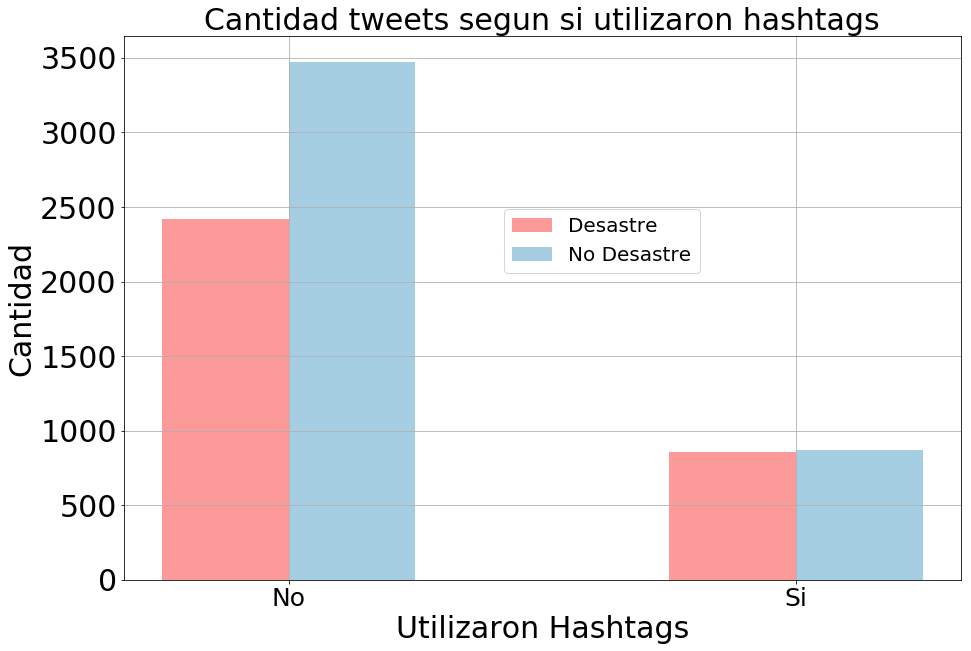

In [18]:
plt.figure(figsize=[15,10])
x=np.arange(2)
y=['No','Si']
plt.bar(x,datos_barras_v2[datos_barras_v2['target']==1]['cantidad'], width = 0.25,color=plt.cm.Paired(4),label='Desastre')
plt.bar(x+0.25,datos_barras_v2[datos_barras_v2['target']==0]['cantidad'], width = 0.25,color=plt.cm.Paired(0),label='No Desastre')
plt.grid(True)
plt.xticks([0.125,1.125],y,size=25) 
plt.yticks(size=30)
plt.title('Cantidad tweets segun si utilizaron hashtags',size=30)
plt.xlabel('Utilizaron Hashtags',size=30)
plt.ylabel('Cantidad',size=30)
plt.legend(bbox_to_anchor=(0.5, 0.2, 0.2, 0.5),prop={'size': 20})
#plt.savefig("cantidad_tweets_utilizaron_hashtags_1.png",bbox_inch='tight')
plt.show()

## Palabras clave mas utilizadas

In [8]:
datos=pd.read_csv('train.csv')

In [9]:
palabras_clave=datos[['keyword','target']]

In [10]:
palabras_clave.isnull().sum()

keyword    61
target      0
dtype: int64

In [11]:
palabras_clave=palabras_clave.dropna()

In [12]:
def limpiar_keyword(x):
  x=re.sub(r"%20","", x)
  return stemmer.stem(x)

In [13]:
palabras_clave['keyword']=palabras_clave['keyword'].apply(limpiar_keyword)

In [14]:
palabras_clave['cantidad']=1

In [15]:
cant_palabras_clave=palabras_clave.groupby('keyword').agg({'cantidad':'sum'}).reset_index()

In [16]:
cant_palabras_clave.sort_values('cantidad',ascending=False,inplace=True)

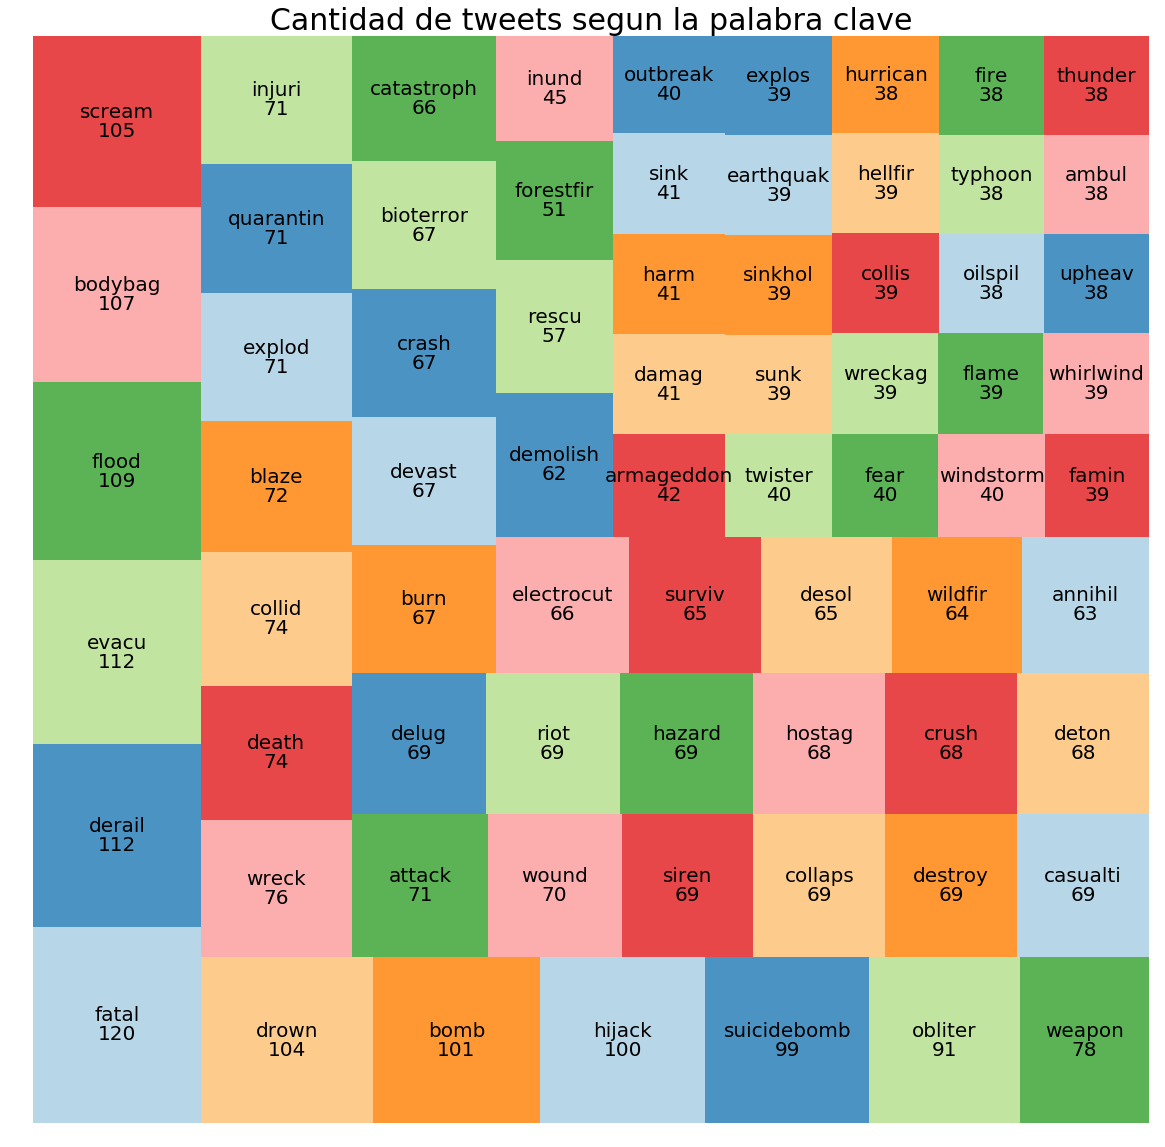

In [17]:
plt.figure(figsize=[20,20])
plt.style.use('ggplot')
squarify.plot(sizes=cant_palabras_clave[cant_palabras_clave['cantidad']>=38]['cantidad'], label=cant_palabras_clave[cant_palabras_clave['cantidad']>=38]['keyword'],
              alpha=.8 ,color=plt.cm.Paired(np.arange(8)),value=cant_palabras_clave[cant_palabras_clave['cantidad']>=38]['cantidad'],
             text_kwargs={'fontsize':20})
plt.title('Cantidad de tweets segun la palabra clave',size=30)
plt.axis('off')
plt.savefig("cantidad_tweets_palabra_clave_0.png",bbox_inches='tight')
plt.show()

In [18]:
palabras_clave_desastre=palabras_clave[palabras_clave['target']==1]

In [19]:
cant_palabras_clave_desastre=palabras_clave_desastre.groupby('keyword').agg({'cantidad':'sum'}).reset_index()

In [20]:
cant_palabras_clave_desastre.sort_values('cantidad',ascending=False,inplace=True)

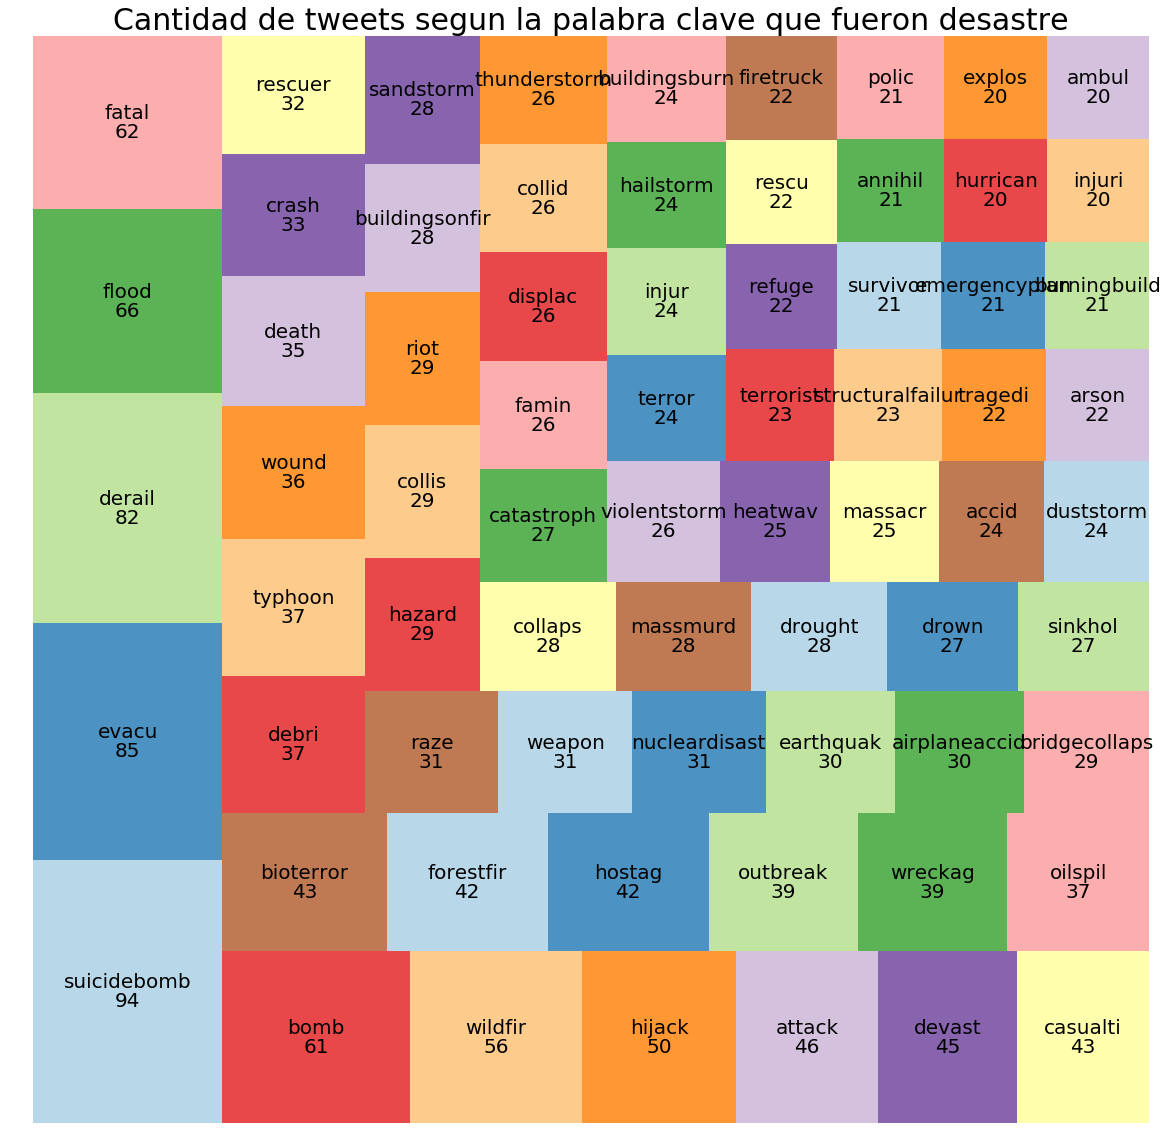

In [21]:
plt.figure(figsize=[20,20])
plt.style.use('ggplot')
squarify.plot(sizes=cant_palabras_clave_desastre[cant_palabras_clave_desastre['cantidad']>=20]['cantidad'], label=cant_palabras_clave_desastre[cant_palabras_clave_desastre['cantidad']>=20]['keyword'],
              alpha=.8 ,color=plt.cm.Paired(np.arange(12)),value=cant_palabras_clave_desastre[cant_palabras_clave_desastre['cantidad']>=20]['cantidad'],
             text_kwargs={'fontsize':20})
plt.title('Cantidad de tweets segun la palabra clave que fueron desastre',size=30)
plt.axis('off')
plt.savefig("cantidad_tweets_palabra_clave_1.png",bbox_inches='tight')
plt.show()

In [22]:
palabras_clave_nodesastre=palabras_clave[palabras_clave['target']==0]

In [23]:
cant_palabras_clave_nodesastre=palabras_clave_nodesastre.groupby('keyword').agg({'cantidad':'sum'}).reset_index()

In [24]:
cant_palabras_clave_nodesastre.sort_values('cantidad',ascending=False,inplace=True)

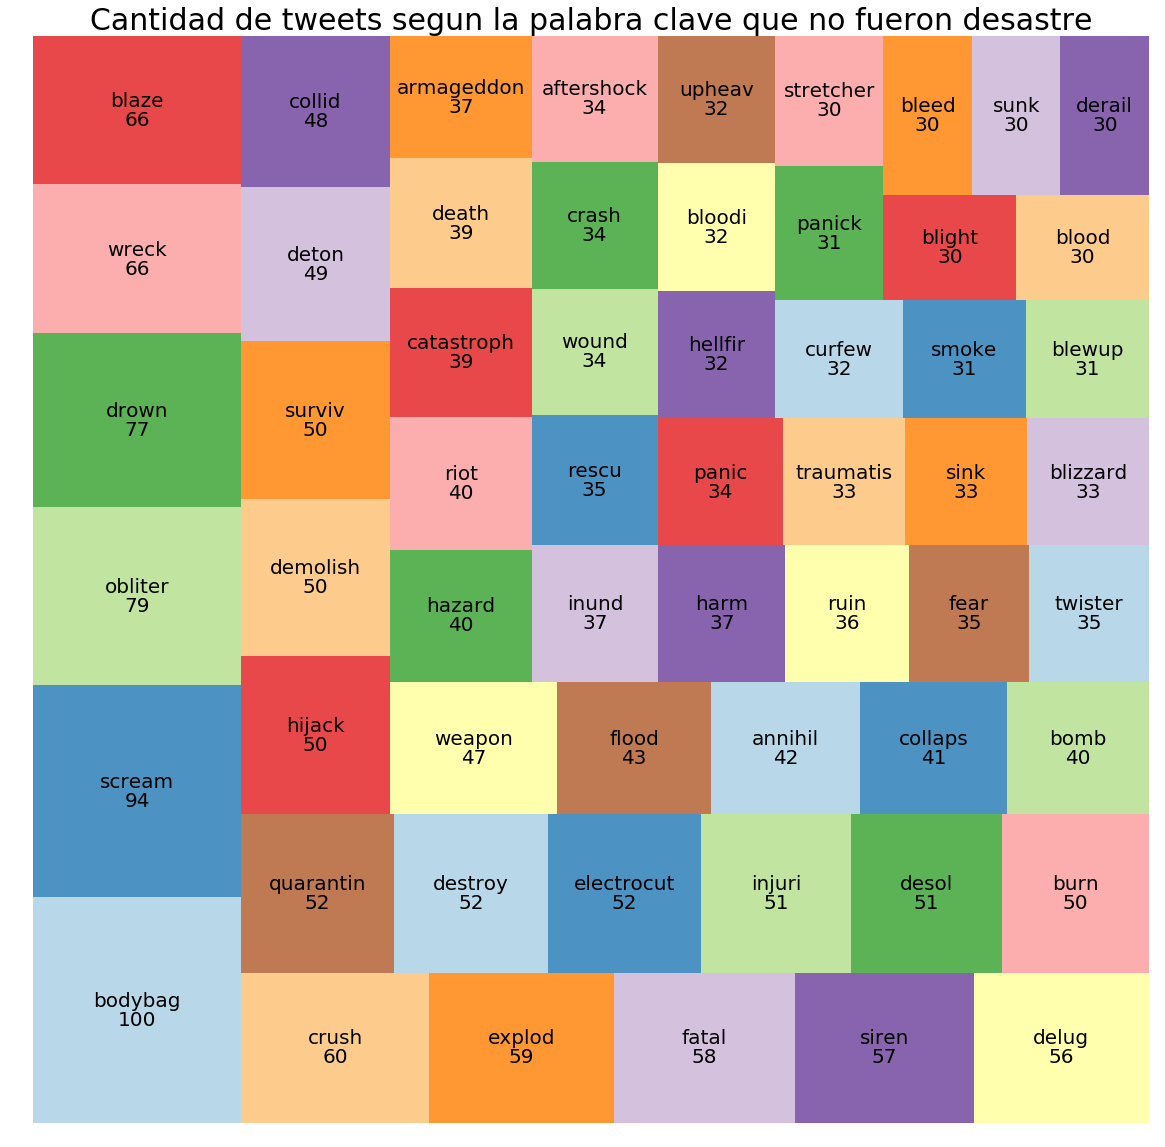

In [25]:
plt.figure(figsize=[20,20])
plt.style.use('ggplot')
squarify.plot(sizes=cant_palabras_clave_nodesastre[cant_palabras_clave_nodesastre['cantidad']>=30]['cantidad'], label=cant_palabras_clave_nodesastre[cant_palabras_clave_nodesastre['cantidad']>=30]['keyword'],
              alpha=.8 ,color=plt.cm.Paired(np.arange(12)),value=cant_palabras_clave_nodesastre[cant_palabras_clave_nodesastre['cantidad']>=30]['cantidad'],
             text_kwargs={'fontsize':20})
plt.title('Cantidad de tweets segun la palabra clave que no fueron desastre',size=30)
plt.axis('off')
plt.savefig("cantidad_tweets_palabra_clave_2.png",bbox_inches='tight')
plt.show()

## sdsds